# Bank Marketing Campaign

**Problem Description**

ABC Bank aims to sell deposit products to customers efficiently by identifying potential buyers. To achieve this goal, they aim to develop a machine learning model that predicts whether customers will purchase deposits based on past interactions with banks or other financial institutions. By utilizing this model, Bank ABC can focus its marketing efforts on customers who have a higher likelihood of purchasing the product, thereby saving resources and optimizing their marketing strategy.



**Business Understanding**

In this case Bank ABC wants to:
- Identify potential customers who are more likely to purchase their term deposit product.
- Optimize marketing efforts by targeting specific customer segments with higher chances of conversion.
- Develop a machine learning model to automate the process of customer segmentation and prediction.

## Import Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Dataset/bank-additional/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

## Data Understanding

**Attribute Information:**

Input variables:

bank client data:
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')


related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: 'yes','no')

### Check null value

In [5]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There's no null value in the dataset

### Check column data types

In [6]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

### Check data statistic

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


#### Select Columns by data type

In [8]:
numeric_cols = []
non_numeric_cols=[]
datetime_cols = []

numeric_cols = df.select_dtypes(include=['int64','float64']).columns.to_list()
non_numeric_cols = df.select_dtypes(include=['object']).columns.to_list()
datetime_cols = df.select_dtypes(include=['datetime64']).columns.to_list()

print(f'numeric cols: {numeric_cols}\nnon-numeric cols: {non_numeric_cols}\ndatetime cols: {datetime_cols}')

numeric cols: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
non-numeric cols: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
datetime cols: []


In [9]:
df[numeric_cols].head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [10]:
df[non_numeric_cols].head(25)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
5,services,married,basic.9y,unknown,no,no,telephone,may,mon,nonexistent,no
6,admin.,married,professional.course,no,no,no,telephone,may,mon,nonexistent,no
7,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,nonexistent,no
8,technician,single,professional.course,no,yes,no,telephone,may,mon,nonexistent,no
9,services,single,high.school,no,yes,no,telephone,may,mon,nonexistent,no


The columns month and day_of_week must be converted to datetime

In [11]:
df[['month', 'day_of_week']].nunique()

month          10
day_of_week     5
dtype: int64

In [12]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [13]:
df['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

#### Converting month and day_of_week to datetime

In [14]:
from datetime import datetime, timedelta

month_mapping = {
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12, 'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4
}
day_of_week_mapping = {
    'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4, 'sat': 5, 'sun': 6
}

# Fungsi untuk menghasilkan tanggal berdasarkan bulan dan hari dalam satu tahun tertentu
def calculate_date(year, month, day_of_week):
    base_date = datetime(year, month_mapping[month], 1)
    day_offset = (day_of_week_mapping[day_of_week] - base_date.weekday()) % 7
    date = base_date + timedelta(days=day_offset)
    return date

# Menghitung tanggal-tanggal untuk kolom baru 'datetime'
df['datetime'] = df.apply(lambda row: calculate_date(2008, row['month'], row['day_of_week']), axis=1)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,datetime
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008-05-05
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008-05-05
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008-05-05
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008-05-05
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008-05-05


In [15]:
non_numeric_cols.append('datetime')

In [16]:
df[non_numeric_cols].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,datetime
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no,2008-05-05
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no,2008-05-05
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no,2008-05-05
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no,2008-05-05
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no,2008-05-05


In [17]:
df[non_numeric_cols].dtypes

job                    object
marital                object
education              object
default                object
housing                object
loan                   object
contact                object
month                  object
day_of_week            object
poutcome               object
y                      object
datetime       datetime64[ns]
dtype: object

#### Drop unused columns

In [18]:
df = df.drop(columns=['month', 'day_of_week'])

In [19]:
non_numeric_cols.remove('month')
non_numeric_cols.remove('day_of_week')

In [20]:
df[non_numeric_cols].head()

,job,marital,education,default,housing,loan,contact,poutcome,y,datetime
0,housemaid,married,basic.4y,no,no,no,telephone,nonexistent,no,2008-05-05
1,services,married,high.school,unknown,no,no,telephone,nonexistent,no,2008-05-05
2,services,married,high.school,no,yes,no,telephone,nonexistent,no,2008-05-05
3,admin.,married,basic.6y,no,no,no,telephone,nonexistent,no,2008-05-05
4,services,married,high.school,no,no,yes,telephone,nonexistent,no,2008-05-05


In [21]:
df.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,datetime
0,56,housemaid,married,basic.4y,no,no,no,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008-05-05
1,57,services,married,high.school,unknown,no,no,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008-05-05
2,37,services,married,high.school,no,yes,no,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008-05-05
3,40,admin.,married,basic.6y,no,no,no,telephone,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008-05-05
4,56,services,married,high.school,no,no,yes,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008-05-05


In [22]:
df.dtypes

age                        int64
job                       object
marital                   object
education                 object
default                   object
housing                   object
loan                      object
contact                   object
duration                   int64
campaign                   int64
pdays                      int64
previous                   int64
poutcome                  object
emp.var.rate             float64
cons.price.idx           float64
cons.conf.idx            float64
euribor3m                float64
nr.employed              float64
y                         object
datetime          datetime64[ns]
dtype: object

#### Check skewness and outliers

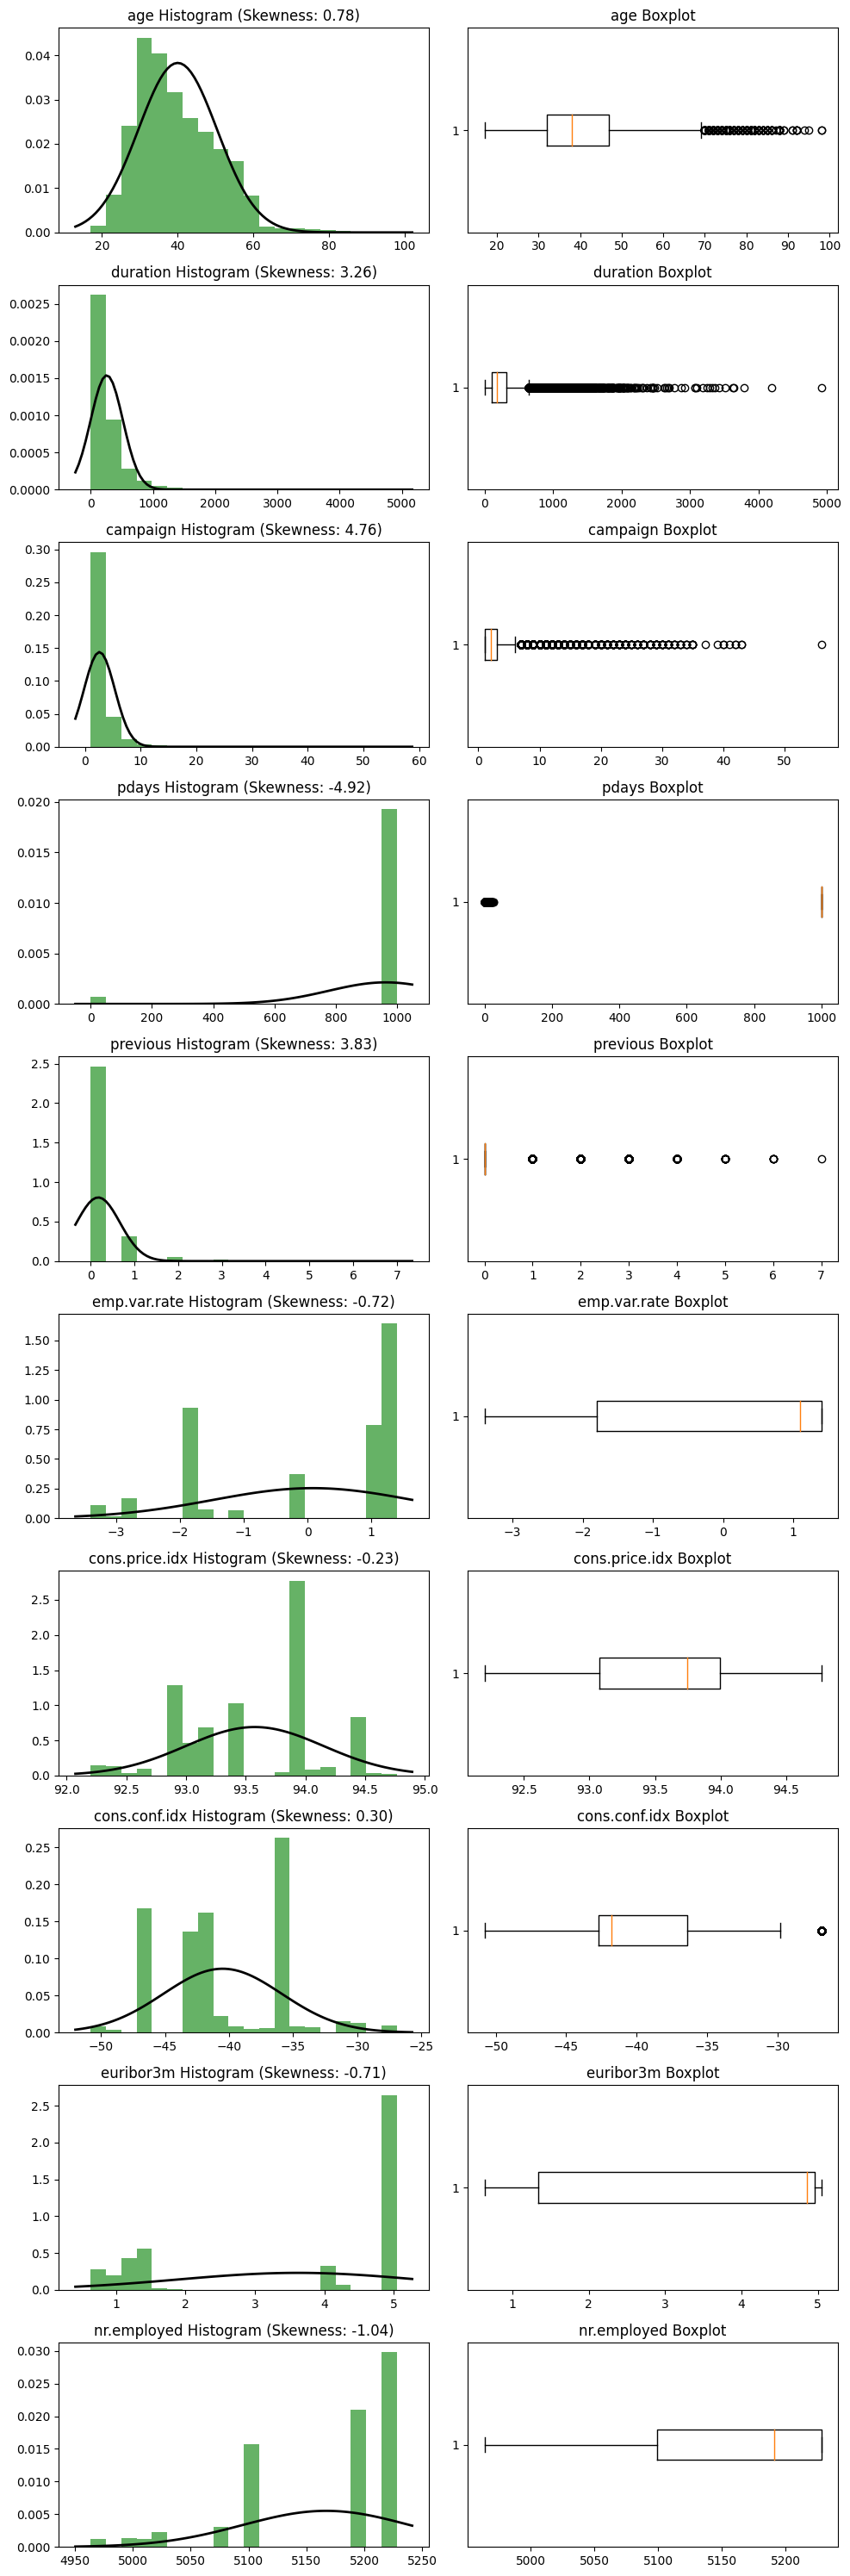

In [23]:
from scipy.stats import norm

fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=2, figsize=(10, 30))

for i, (column_name, column_data) in enumerate(df[numeric_cols].items()):
    axes[i, 0].hist(column_data, bins=20, density=True, alpha=0.6, color='g')
    axes[i, 0].set_title(f'{column_name} Histogram')

    # add gaussian distributions
    mu, std = norm.fit(column_data)
    xmin, xmax = axes[i, 0].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axes[i, 0].plot(x, p, 'k', linewidth=2)

    # add skewness
    skewness = np.mean((column_data - np.mean(column_data))**3) / np.mean((column_data - np.mean(column_data))**2)**(3/2)
    axes[i, 0].set_title(f'{column_name} Histogram (Skewness: {skewness:.2f})')

    # add boxplot
    axes[i, 1].boxplot(column_data, vert=False)
    axes[i, 1].set_title(f'{column_name} Boxplot')

plt.tight_layout()
plt.show()

From the boxplot and histogram for Age, outliers from those columns should be removed because they display oddities.

I decided to delete age > 70

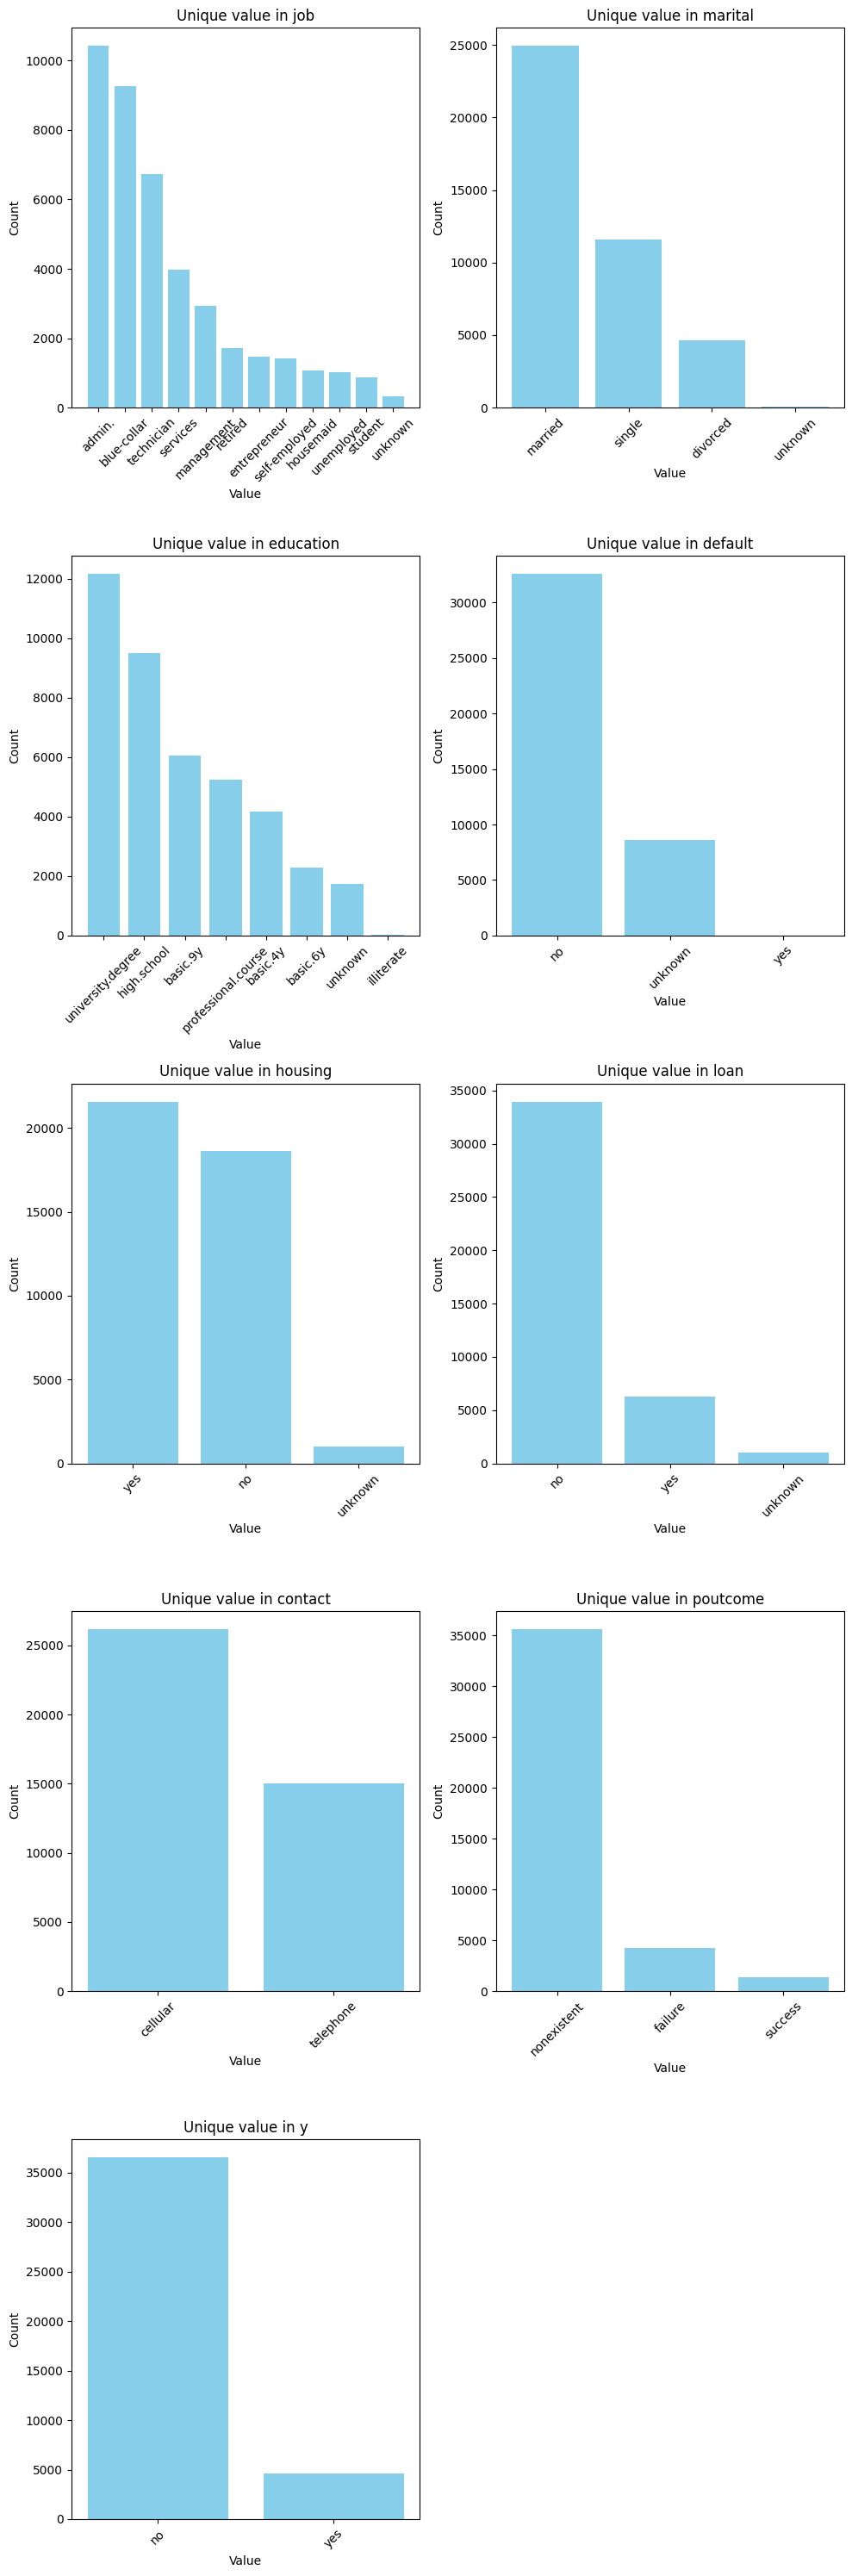

In [24]:
non_numeric_cols.remove('datetime')
num_columns = len(non_numeric_cols)
num_rows = (num_columns + 1) // 2  # Pembulatan ke atas untuk jumlah baris

fig, axes = plt.subplots(num_rows, 2, figsize=(10, 30))  # Ukuran gambar

# Membuat bar chart untuk setiap kolom
for i, column in enumerate(non_numeric_cols):
    # Menghitung jumlah nilai unik
    value_counts = df[column].value_counts()
    
    # Menentukan posisi subplot
    row = i // 2
    col = i % 2
    
    # Membuat bar chart
    axes[row, col].bar(value_counts.index, value_counts.values, color='skyblue')
    axes[row, col].set_title(f'Unique value in {column}')
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Count')
    axes[row, col].tick_params(axis='x', rotation=45)  # Rotasi label x untuk memudahkan membaca

# Menyembunyikan subplot yang tidak digunakan
if num_columns % 2 != 0:
    fig.delaxes(axes[num_rows - 1, 1])

plt.tight_layout()
plt.show()


#### Delete Outlier

In [25]:
'''
Code for outlier deletion using IQR
'''

# def remove_outliers(df, cols):
#     df_outliers = df.copy()

#     for col_name in cols:
#         Q1  = df[col_name].quantile(0.25)
#         Q3  = df[col_name].quantile(0.75)
#         IQR = Q3 - Q1

#         lower = Q1 - 1.5*IQR
#         upper = Q3 - 1.5*IQR

#         df_outliers = df_outliers[(df_outliers[col_name]>=lower) & (df_outliers[col_name]<=upper)]

#     return  df_outliers

# df_outliers = remove_outliers(df, ['age'])

'\nCode for outlier deletion using IQR\n'

In [26]:
df_outliers = df.copy()

df_outliers = df_outliers[df_outliers['age']<70]

In [27]:
df_outliers.shape

(40719, 20)

In [28]:
df_outliers = df_outliers[df_outliers['cons.conf.idx']<-30]

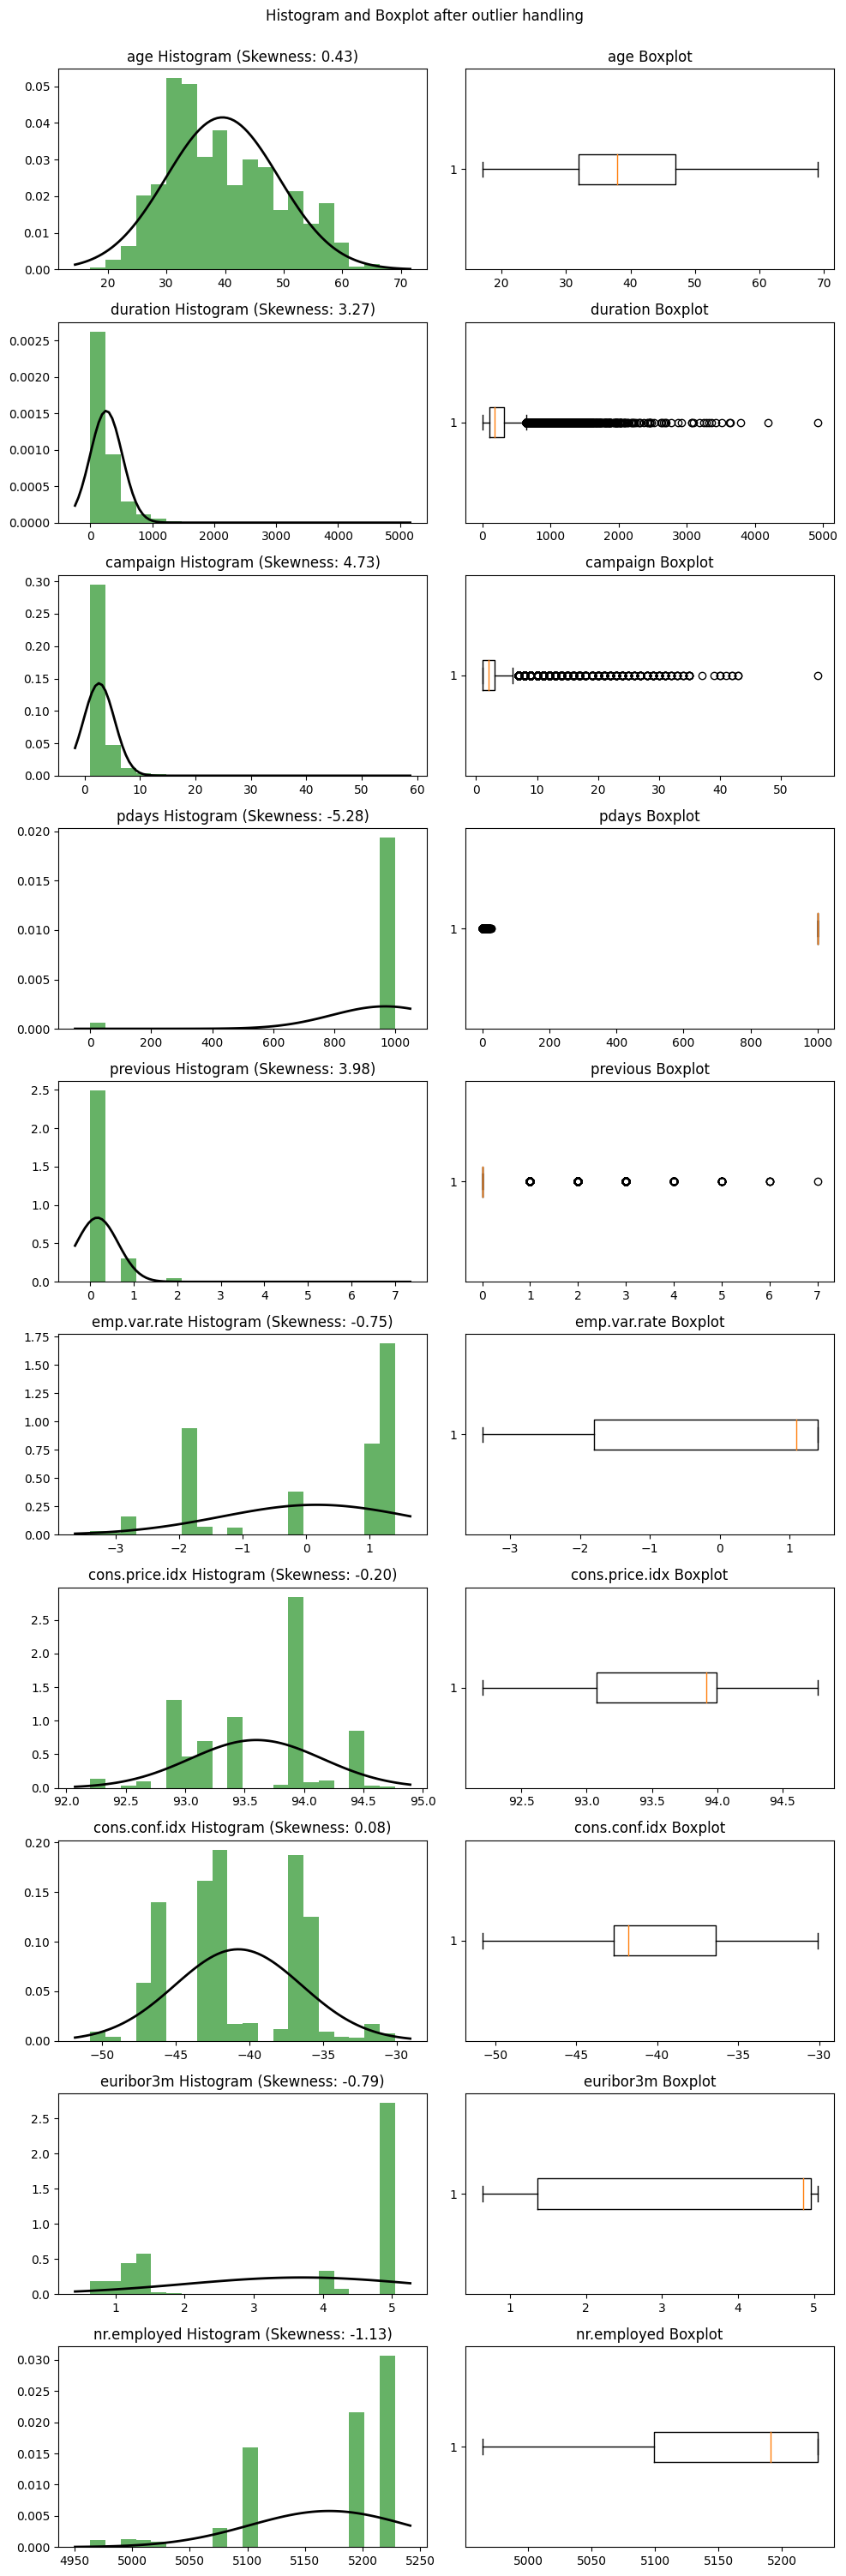

In [56]:
from scipy.stats import norm

fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=2, figsize=(10, 30))
fig.suptitle('Histogram and Boxplot after outlier handling', y=1) 

for i, (column_name, column_data) in enumerate(df_outliers[numeric_cols].items()):
    axes[i, 0].hist(column_data, bins=20, density=True, alpha=0.6, color='g')
    axes[i, 0].set_title(f'{column_name} Histogram')

    # add gaussian distributions
    mu, std = norm.fit(column_data)
    xmin, xmax = axes[i, 0].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axes[i, 0].plot(x, p, 'k', linewidth=2)

    # add skewness
    skewness = np.mean((column_data - np.mean(column_data))**3) / np.mean((column_data - np.mean(column_data))**2)**(3/2)
    axes[i, 0].set_title(f'{column_name} Histogram (Skewness: {skewness:.2f})')

    # add boxplot
    axes[i, 1].boxplot(column_data, vert=False)
    axes[i, 1].set_title(f'{column_name} Boxplot')

plt.tight_layout()
plt.show()


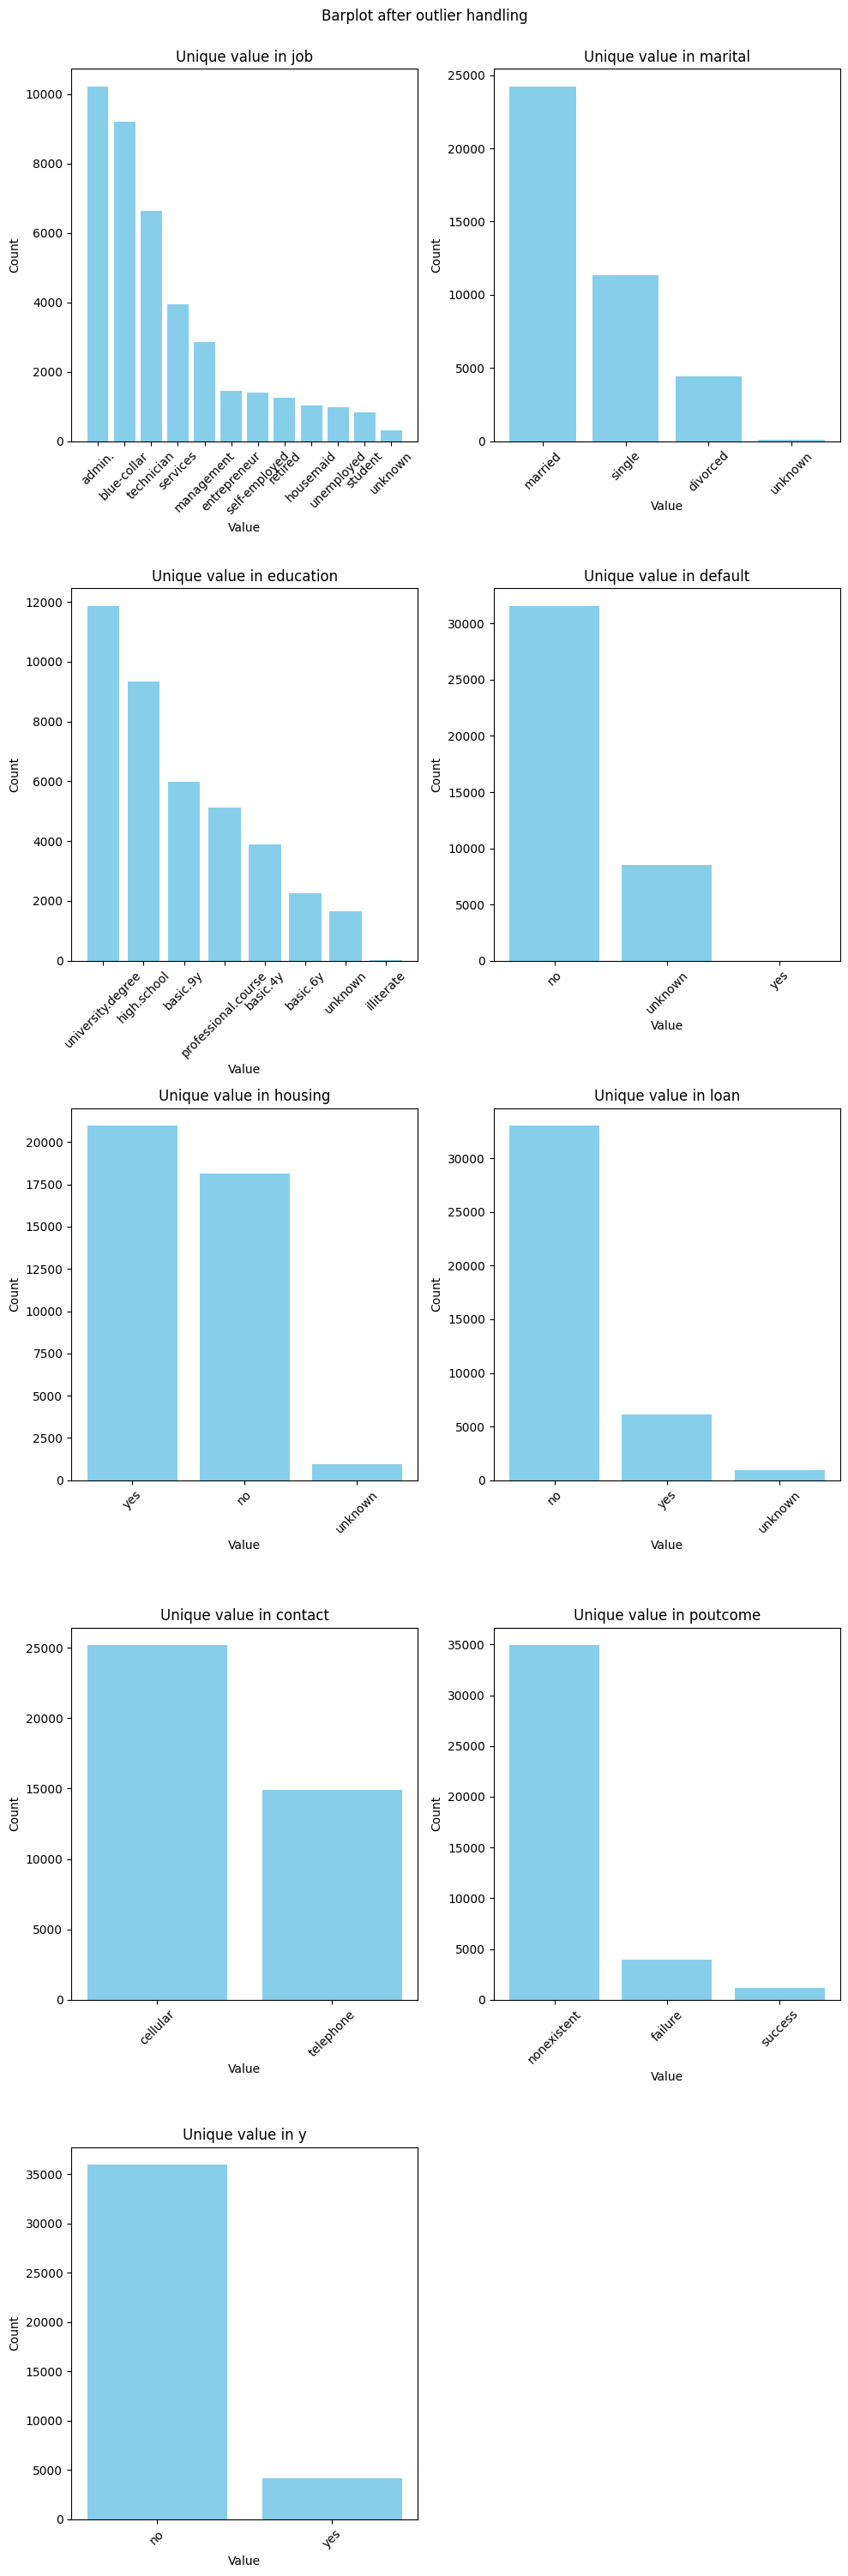

In [57]:
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 30)) 
fig.suptitle('Barplot after outlier handling', y=1) 

for i, column in enumerate(non_numeric_cols):
    value_counts = df_outliers[column].value_counts()

    row = i // 2
    col = i % 2

    axes[row, col].bar(value_counts.index, value_counts.values, color='skyblue')
    axes[row, col].set_title(f'Unique value in {column}')
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Count')
    axes[row, col].tick_params(axis='x', rotation=45)

# Hide unused subplot
if num_columns % 2 != 0:
    fig.delaxes(axes[num_rows - 1, 1])

plt.tight_layout()
plt.show()


##### conclusions

Seems better. The target is imbalanced, I will use oversampling for `yes` value using SMOTE to handle the class imbalance later in modeling.

I decided not to delete outliers in `duration`, because in the data description, this attribute highly affects the output target. If the call duration is 0, then the result (y) is 'no'. Also, I decided not to delete `campaign`.

Although call duration (duration) has a significant influence on the `y`, it is important to consider the purpose of the model to be developed. In this context, call duration is a factor that reflects the outcome of an interaction with a client, not a factor that predicts the outcome of that interaction in advance. Therefore, using call duration in the model can cause information leakage and make the model appear to be better than it actually is.

However, if the main goal of the model is to make predictions regarding the outcome of the phone call made (i.e., whether the client will subscribe or not), then call duration should not be used in the model. This is because the call duration will mostly be known after the call is made, and using that information in the model would make it unrealistic and less useful in practical scenarios.

In modeling I will create 2 models by using and removing `duration` to carry out evaluations.

In [31]:
df_outliers[df_outliers['duration']==0].size

80

#### Encode categorical data

In [32]:
df_outliers[non_numeric_cols].nunique()

job          12
marital       4
education     8
default       3
housing       3
loan          3
contact       2
poutcome      3
y             2
dtype: int64

In [33]:
for cols in (df_outliers[non_numeric_cols]):
    print(f"Unique value in {cols}: {df_outliers[cols].unique()}\n")

Unique value in job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Unique value in marital: ['married' 'single' 'divorced' 'unknown']

Unique value in education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Unique value in default: ['no' 'unknown' 'yes']

Unique value in housing: ['no' 'yes' 'unknown']

Unique value in loan: ['no' 'yes' 'unknown']

Unique value in contact: ['telephone' 'cellular']

Unique value in poutcome: ['nonexistent' 'failure' 'success']

Unique value in y: ['no' 'yes']



I will use the value replacement method to change the values 'yes' to 1, 'unknown' to 0, and 'no' to -1 for [`'default'`, `'housing'`, `'loan'`] columns; 'no' to 0, and  'yes' to 1 for `y`; and use One-Hot encoder for other columns because it has no order or level.

In [34]:
df_encoded = df_outliers.copy()

def label_encoder (df, col):
    mapping = {'yes': 1, 'unknown': 0, 'no': -1}

    for col_name in col:
        df[col_name] = df[col_name].map(mapping)

label_encoder(df_encoded, ['default', 'housing', 'loan'])

In [35]:
df_encoded['y'] = df_encoded['y'].map({'yes': 1, 'no': 0})

In [36]:
df_encoded.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,datetime
0,56,housemaid,married,basic.4y,-1,-1,-1,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,2008-05-05
1,57,services,married,high.school,0,-1,-1,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,2008-05-05
2,37,services,married,high.school,-1,1,-1,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,2008-05-05
3,40,admin.,married,basic.6y,-1,-1,-1,telephone,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,2008-05-05
4,56,services,married,high.school,-1,-1,1,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,2008-05-05


In [37]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df_encoded[['job', 'marital', 'education', 'contact', 'poutcome']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['job', 'marital', 'education', 'contact', 'poutcome']))
encoded_df.head()


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [38]:
df_encoded = pd.concat([df_encoded.drop(columns=['job', 'marital', 'education', 'contact', 'poutcome']), encoded_df], axis=1)
df_encoded.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56.0,-1.0,-1.0,-1.0,261.0,1.0,999.0,0.0,1.1,93.994,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,57.0,0.0,-1.0,-1.0,149.0,1.0,999.0,0.0,1.1,93.994,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,37.0,-1.0,1.0,-1.0,226.0,1.0,999.0,0.0,1.1,93.994,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,40.0,-1.0,-1.0,-1.0,151.0,1.0,999.0,0.0,1.1,93.994,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,56.0,-1.0,-1.0,1.0,307.0,1.0,999.0,0.0,1.1,93.994,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [39]:
df_encoded.columns

Index(['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'datetime', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [40]:
df_encoded.dtypes

age                                     float64
default                                 float64
housing                                 float64
loan                                    float64
duration                                float64
campaign                                float64
pdays                                   float64
previous                                float64
emp.var.rate                            float64
cons.price.idx                          float64
cons.conf.idx                           float64
euribor3m                               float64
nr.employed                             float64
y                                       float64
datetime                         datetime64[ns]
job_admin.                              float64
job_blue-collar                         float64
job_entrepreneur                        float64
job_housemaid                           float64
job_management                          float64
job_retired                             

## EDA

I've made histogram, boxplot, and barplot before.

In [41]:
df_eda = df_encoded.copy()

In [42]:
df_eda.describe().T

,count,mean,min,25%,50%,75%,max,std
age,40092.0,39.559214,17.0,32.0,38.0,47.0,69.0,9.606717
default,40092.0,-0.78679,-1.0,-1.0,-1.0,-1.0,1.0,0.409762
housing,40092.0,0.070263,-1.0,-1.0,1.0,1.0,1.0,0.985377
loan,40092.0,-0.671979,-1.0,-1.0,-1.0,-1.0,1.0,0.724111
duration,40092.0,257.764217,0.0,102.0,179.0,318.0,4918.0,259.543973
campaign,40092.0,2.590068,1.0,1.0,2.0,3.0,56.0,2.79524
pdays,40092.0,966.807268,0.0,999.0,999.0,999.0,999.0,175.859645
previous,40092.0,0.161828,0.0,0.0,0.0,0.0,7.0,0.477684
emp.var.rate,40092.0,0.164961,-3.4,-1.8,1.1,1.4,1.4,1.50376
cons.price.idx,40092.0,93.599256,92.201,93.075,93.918,93.994,94.767,0.559586


In [43]:
pearson_corr = df_eda.corrwith(df_eda['y'])

print("Pearson Correlation:")
print(pearson_corr)

Pearson Correlation:
age                             -0.019857
default                         -0.094801
housing                          0.012384
loan                            -0.003898
duration                         0.419233
campaign                        -0.059984
pdays                           -0.313333
previous                         0.218832
emp.var.rate                    -0.273753
cons.price.idx                  -0.109333
cons.conf.idx                    0.003834
euribor3m                       -0.286513
nr.employed                     -0.332813
y                                1.000000
datetime                         0.011143
job_admin.                       0.027334
job_blue-collar                 -0.048644
job_entrepreneur                -0.007692
job_housemaid                   -0.014855
job_management                   0.002474
job_retired                      0.023362
job_self-employed                0.002989
job_services                    -0.009728
job_student  

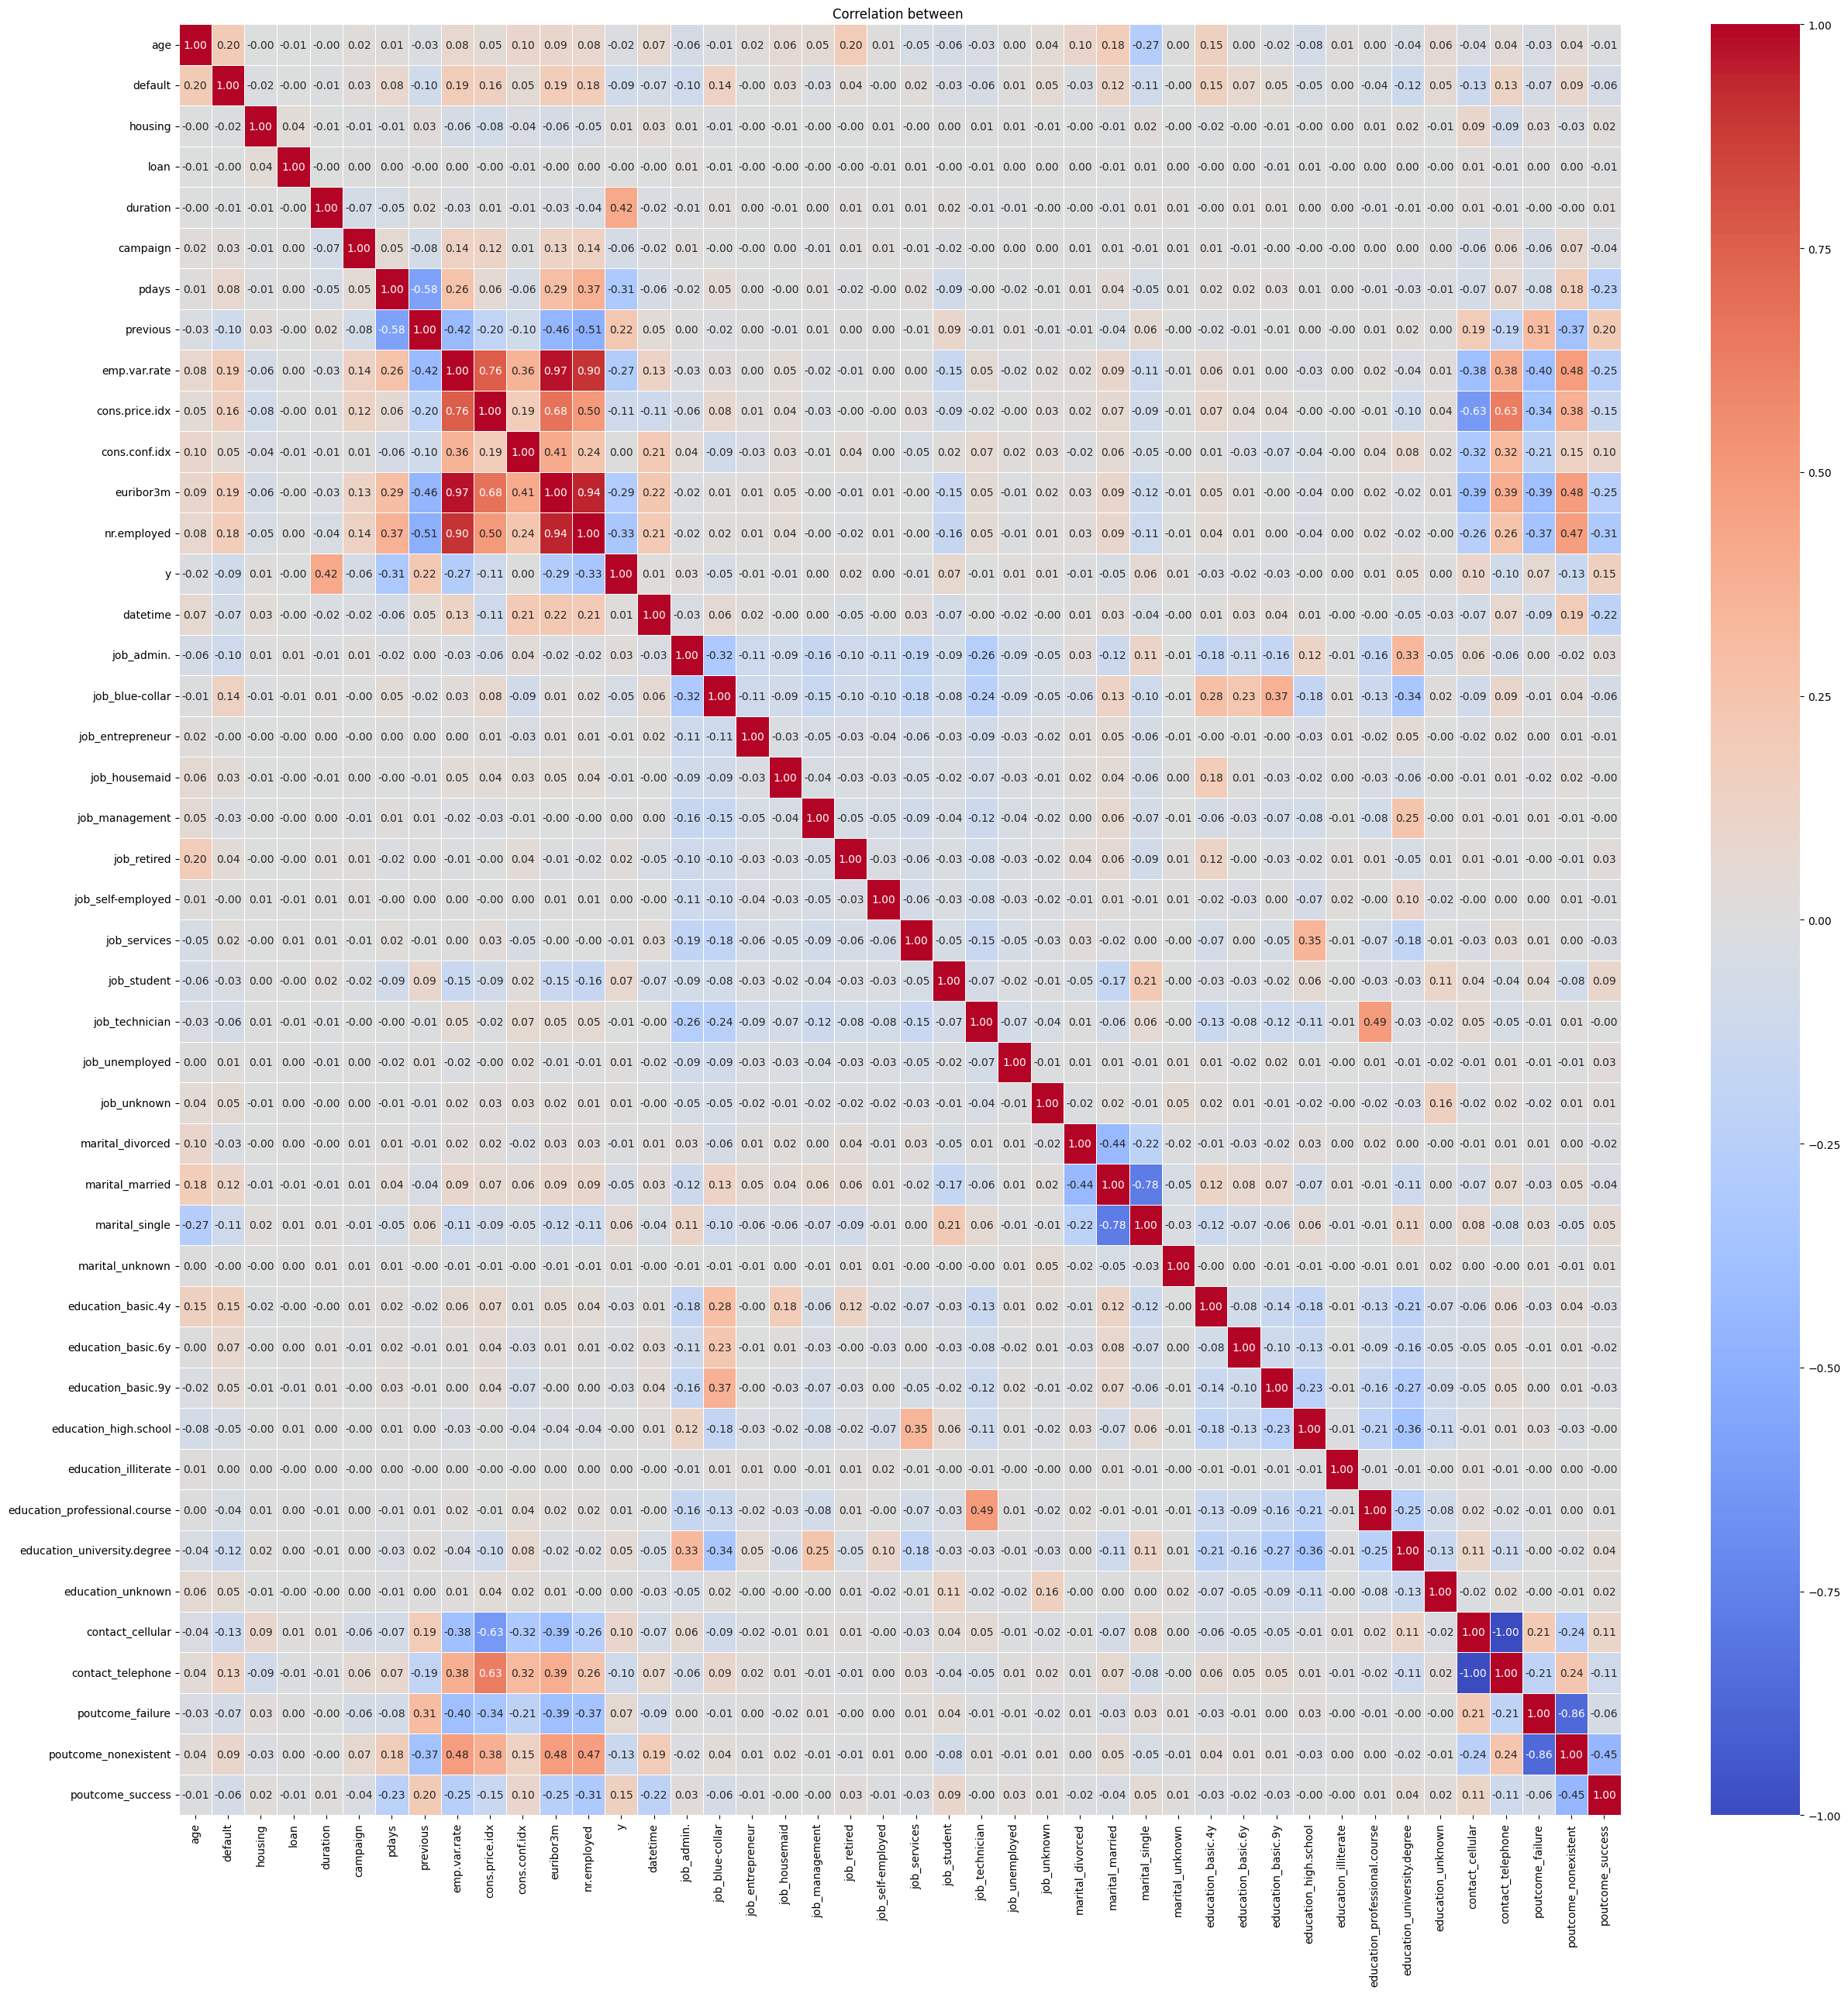

In [44]:
correlation_matrix = df_eda.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation between ')
plt.show()

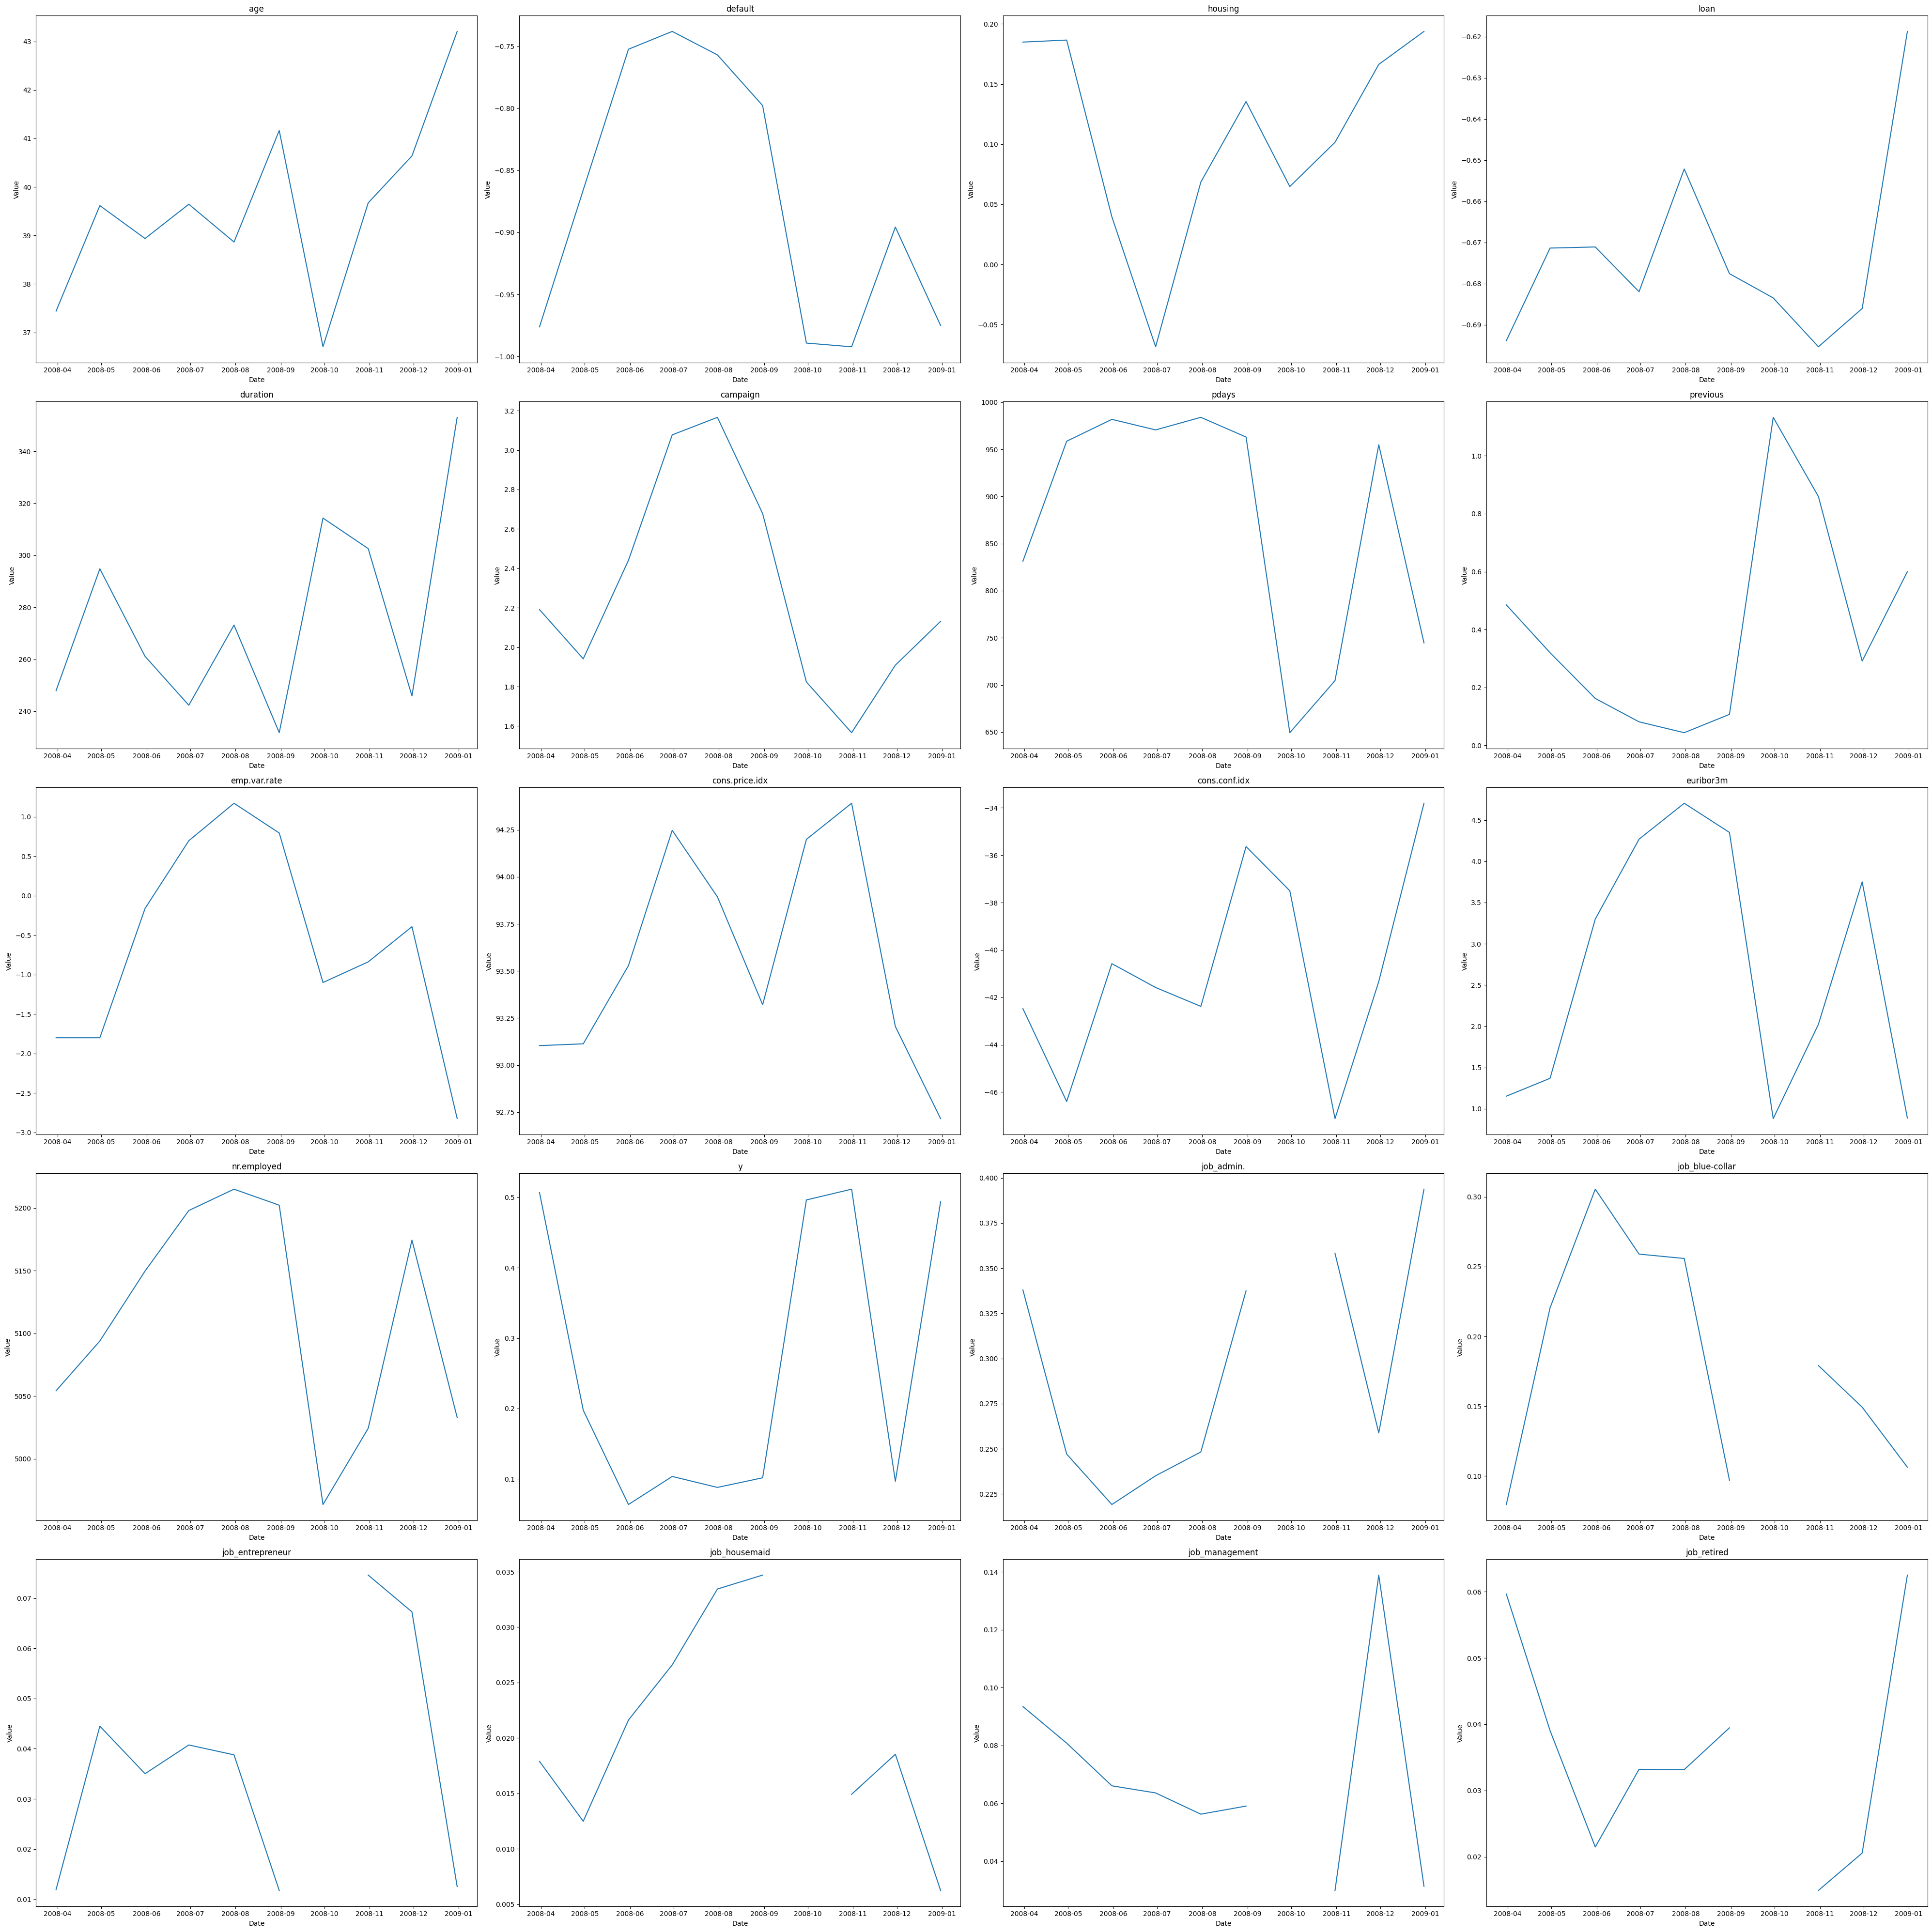

In [51]:
df_eda.set_index('datetime', inplace=True)
df_monthly = df_eda.resample('ME').mean()

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(40, 40))

# List cols for visualization
columns_to_plot = df_monthly.columns.tolist()

for i, ax in enumerate(axes.flatten()):
    if i < len(columns_to_plot):
        column = columns_to_plot[i]
        ax.plot(df_monthly.index, df_monthly[column])
        ax.set_title(column)
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')

plt.tight_layout()
plt.show()
